### Knowledge Review

1. Why is logistic regression better than linear regression in predicting binary outcomes?
2. What are ways to reduce overfitting in logistic regression?
3. How are the logistic regression coefficients different from linear regression coefficients?
4. What are the pros and cons between logistic regression and KNN?

### Visualizing models over variables

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('../../assets/dataset/flight_delays.csv')

In [3]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DEL15,Unnamed: 15
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,900,855.0,0.0,NaN
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,900,856.0,0.0,NaN
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,1230,1226.0,0.0,NaN
3,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,1220,1214.0,0.0,NaN
4,1,4,2015-01-01,AA,19805,AA,11298,1129803,30194,12173,1217302,32134,1305,1754.0,1.0,NaN


In [4]:
df = df[df.DEP_DEL15.notnull()]
df = df.join(pd.get_dummies(df['CARRIER'], prefix='carrier'))
df = df.join(pd.get_dummies(df['DAY_OF_WEEK'], prefix='dow'))
model = lm.LogisticRegression()
features = [i for i in df.columns if 'dow_' in i]

In [5]:
df.columns

Index([u'DAY_OF_MONTH', u'DAY_OF_WEEK', u'FL_DATE', u'UNIQUE_CARRIER',
       u'AIRLINE_ID', u'CARRIER', u'ORIGIN_AIRPORT_ID',
       u'ORIGIN_AIRPORT_SEQ_ID', u'ORIGIN_CITY_MARKET_ID', u'DEST_AIRPORT_ID',
       u'DEST_AIRPORT_SEQ_ID', u'DEST_CITY_MARKET_ID', u'CRS_DEP_TIME',
       u'DEP_TIME', u'DEP_DEL15', u'Unnamed: 15', u'carrier_AA', u'carrier_AS',
       u'carrier_B6', u'carrier_DL', u'carrier_EV', u'carrier_F9',
       u'carrier_HA', u'carrier_MQ', u'carrier_NK', u'carrier_OO',
       u'carrier_UA', u'carrier_US', u'carrier_VX', u'carrier_WN', u'dow_1',
       u'dow_2', u'dow_3', u'dow_4', u'dow_5', u'dow_6', u'dow_7'],
      dtype='object')

In [6]:
df.shape

(458311, 37)

In [9]:
features += ['CRS_DEP_TIME']
model.fit(df[features[1:]], df['DEP_DEL15'])

df['probability'] = model.predict_proba(df[features[1:]])[:,1]

In [91]:
features

['dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'dow_7', 'CRS_DEP_TIME']

### Now lets look at the model by observing how probability of delay changes relative to day of week and departure time

/Users/srikanajan/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:518: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


/Users/srikanajan/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


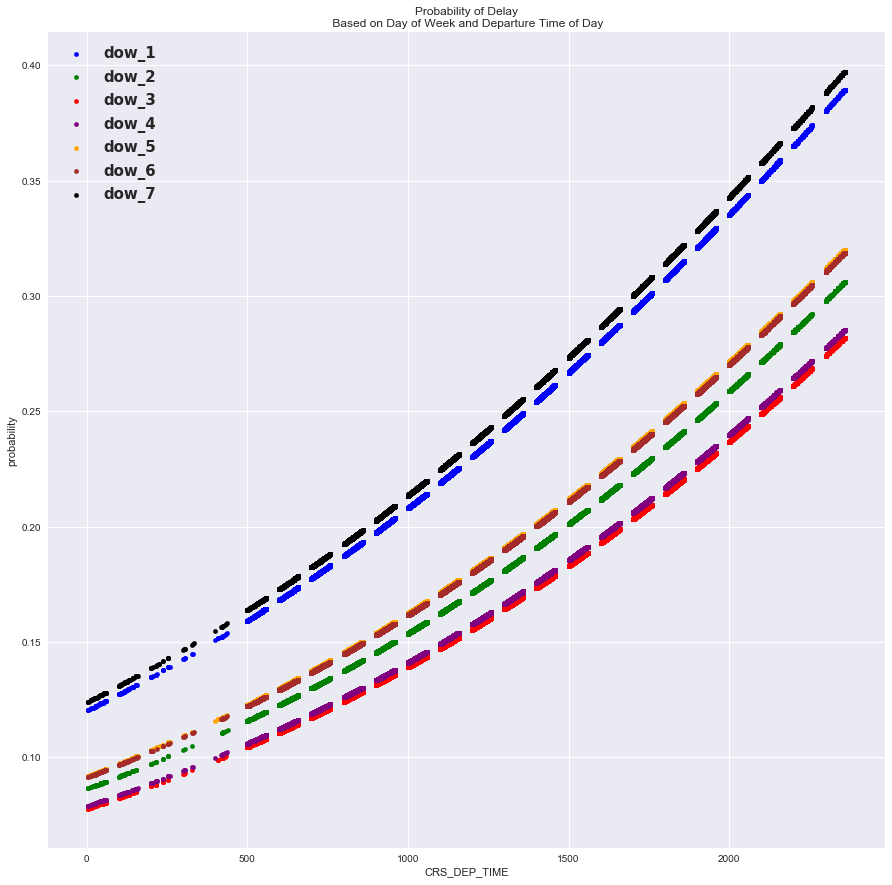

In [10]:
ax1 = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'black']
for e, color in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter', c=color, ax=ax1, figsize=(15,15))
ax1.set(title='Probability of Delay\n Based on Day of Week and Departure Time of Day')

lines, labels = ax1.get_legend_handles_labels()
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
font = {'family' : 'normal',
       'weight' : 'bold',
       'size'   : 22}

plt.rc('font', **font)
ax1.legend(lines[:2], labels=features, loc='upper left',fontsize=15)  # legend for first two lines only

### Try to visualize the model in a different way now. E.g. How does the probability of delay change relative to the specific carrier and departure time?

In [93]:
# Set the feature set to carrier and departure time
features = [i for i in df.columns if 'carrier_' in i]
features += ['CRS_DEP_TIME']

#... go on to build the plot as before

### Explore other interesting hypotheses that you may have relative to this data

### Visualizing Performance Against Baseline

#### Visualizing AUC and comparing Models

In [12]:
from sklearn import dummy, metrics

In [13]:
model0 = dummy.DummyClassifier()
model0.fit(df[features[1:]], df['DEP_DEL15'])
print model0.classes_
df['probability_model_0'] = model0.predict_proba(df[features[1:]])[:,1]

model1 = lm.LogisticRegression()
model1.fit(df[features[1:]], df['DEP_DEL15'])
print model1.classes_
df['probability_model_1'] = model1.predict_proba(df[features[1:]])[:,1]


[ 0.  1.]
[ 0.  1.]


[(0, 1),
 (0, 1),

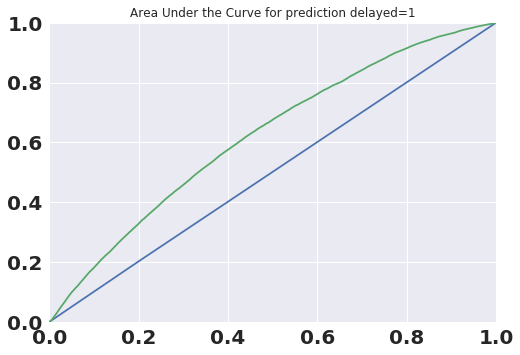

In [14]:
ax = plt.subplot(111)
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_model_0)
ax.plot(vals[0], vals[1])
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_model_1)
ax.plot(vals[0], vals[1])

ax.set(title='Area Under the Curve for prediction delayed=1', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))

#### Visualizing Precision / Recall

In [15]:

model0 = dummy.DummyClassifier()
model0.fit(df[features[1:]], df.DEP_DEL15)
df['probability_model_0'] = model0.predict_proba(df[features[1:]]).T[1]


model = lm.LogisticRegression()
model.fit(df[features[1:]], df.DEP_DEL15)
df['probability_model_1'] = model.predict_proba(df[features[1:]]).T[1]


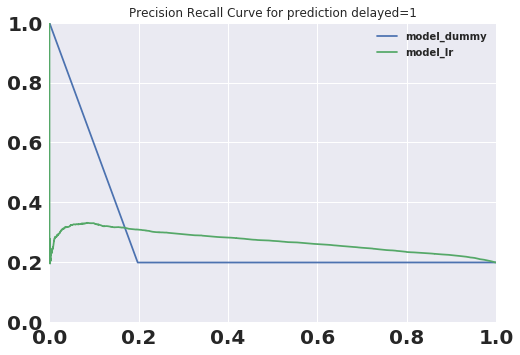

In [24]:
ax = plt.subplot(111)
for i in range(2):
    vals = metrics.precision_recall_curve(df.DEP_DEL15, df['probability_model_' + str(i)])
    ax.plot(vals[1], vals[0])

ax.set(title='Precision Recall Curve for prediction delayed=1', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))
ax.legend(["model_dummy", "model_lr"])

Using models built from the flight data problem earlier in class, work through the same
problems. Your data and models should already be accessible. Your goals:

1. There are many ways to manipulate this data set. Consider what is a proper "categorical" variable, and keep only what is significant. You will easily have 20+ variables. Aim to have at least three visuals that clearly explain the relationship of variables you've used against the predictive survival value.
2. Generate the AUC or precision-recall curve (based on which you think makes more sense), and have a statement that defines, compared to a baseline, how your model performs and any caveats. For example: "My model on average performs at x rate, but the features under-perform and explain less of the data at these thresholds." Consider this as practice for your own project, since the steps you'll take to present your work will be relatively similar.